<a href="https://colab.research.google.com/github/smartaces/openai_agentic_swarms_live_webapi_chat_assistant/blob/main/Shared_OpenAI_Swarm_Multi_API_Agent_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **OpenAI Swarms Simple Demos**

This is a fast and scrappy simple notebook to give a taster of OpenAI's agentic swarm toolset

*   It shows a few basic capabilities, and end with a single assistant chat agent that can call from live web apis.

*   Some examples are based on the OpenAI swarms cookbook, but I have also included a few original ones. You can find the OpenAI cookbook here: https://github.com/openai/swarm

**Connect with Me**

If you like this notebook or in any way found it helpful, feel free to connect with me on LinkedIn here: https://www.linkedin.com/in/james-bentley-1b329214/

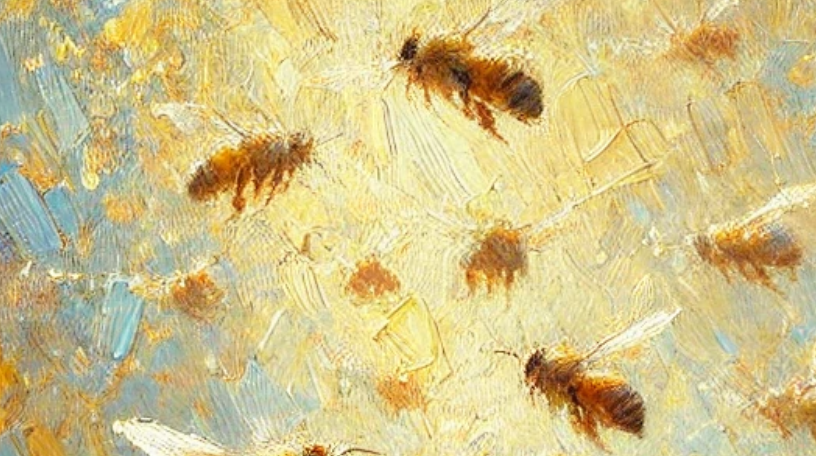

## **Step1: Installs OpenAI python library**

First we need to install the OpenAI python Library

In [ ]:
#installs
!pip install numpy openai>=1.33.0 pytest requests tqdm pre-commit instructor --quiet

In [ ]:
!pip install git+https://github.com/openai/swarm.git

## **Step 2: Set Your OpenAI Key**

To use this notebook and build your solution you will need...


*   An OpenAI user account and API Key (with billing set up)
*   As pictured below add this to your Google Secrets (see the key icon on the left panel) inserting your key in the 'value' field and assigning the following name
*   Key name: openai_key
*   Once that is done, run the below cell[link text](https://), granting key access to the notebook access if prompted




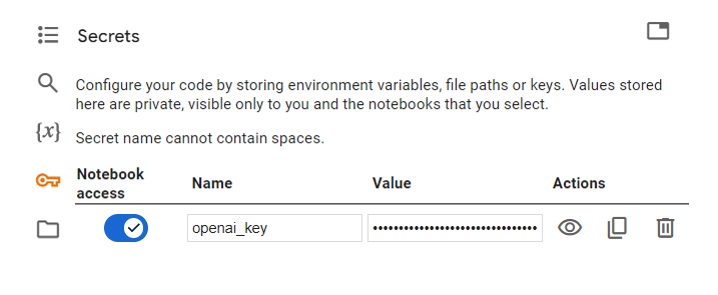


In [ ]:
import os
from openai import OpenAI
from google.colab import userdata
from swarm import Swarm, Agent

# Retrieve your OpenAI API key from Google Colab Secrets
openai_key = userdata.get('openai_key')

# Set the OpenAI API key as an environment variable
os.environ["OPENAI_API_KEY"] = openai_key

# Initialize the Swarm client
client = Swarm()

### **Clone The Swarm Github**

This grabs all the files you need and adds it to the folders section in the left of this menu in a folder called swarm



In [ ]:
! git clone https://github.com/openai/swarm.git

### **Bare Minimum Demos**

The below code provides an example of greeting from a helpful agent

In [ ]:
from swarm import Swarm, Agent

client = Swarm()

agent = Agent(
    name="Agent",
    instructions="You are a helpful agent.",
)

messages = [{"role": "user", "content": "Hi!"}]
response = client.run(agent=agent, messages=messages)

print(response.messages[-1]["content"])

### **Greet User By Name**

An example of an agent greeting a user by their name, to change the name and details output - modify the below line in the code:

**context_variables = {"name": "James", "user_id": 123}**

for example

**context_variables = {"name": "Miley", "user_id": 2024}**

In [ ]:
from swarm import Swarm, Agent

client = Swarm()


def instructions(context_variables):
    name = context_variables.get("name", "User")
    return f"You are a helpful agent. Greet the user by name ({name})."


def print_account_details(context_variables: dict):
    user_id = context_variables.get("user_id", None)
    name = context_variables.get("name", None)
    print(f"Account Details: {name} {user_id}")
    return "Success"


agent = Agent(
    name="Agent",
    instructions=instructions,
    functions=[print_account_details],
)

context_variables = {"name": "James", "user_id": 123}

response = client.run(
    messages=[{"role": "user", "content": "Hi!"}],
    agent=agent,
    context_variables=context_variables,
)
print(response.messages[-1]["content"])

response = client.run(
    messages=[{"role": "user", "content": "Print my account details!"}],
    agent=agent,
    context_variables=context_variables,
)
print(response.messages[-1]["content"])

### **Function Calling**

An example of getting an agent to provide particualr information in a response, for example the weather in New York. This example is set to always return a temperature of 67°F

In [ ]:
from swarm import Swarm, Agent

client = Swarm()


def get_weather(location) -> str:
    return "{'temp':67, 'unit':'F'}"


agent = Agent(
    name="Agent",
    instructions="You are a helpful agent.",
    functions=[get_weather],
)

messages = [{"role": "user", "content": "What's the weather in New York"}]

response = client.run(agent=agent, messages=messages)
print(response.messages[-1]["content"])

### **Broken Car Salesman Agent Chat Loop (With No Triage To Helper Agents)**

In this example the Agent is on a mission to sell you a broken down car. This is just a looping conversation with a single agent and doesn't involve any triage to other helpers.

**Important**

*Once you are done with speaking to the agent make sure you click runtime in the top menu of colab, and then navigate to interrupt execution to stop the above cell from running. You need to do this.*

In [ ]:
# a bit of styling for the conversation
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
#the agent code
from swarm import Swarm, Agent

client = Swarm()

my_agent = Agent(
    name="Agent",
    instructions="""You are a helpful agent that at every opportunity seeks to sell the user a broken down car.
                  You know the car is broken down, but find ingenious ways to frame the benefits of a broken down car""",
)


# Emoji and role mappings
EMOJI_MAP = {
    "user": "😊 ",
    "assistant": "🤖 "
}

ROLE_TO_SENDER = {
    "user": "User",
    "agent": "Agent"
}

def pretty_print_messages(messages):
    for message in messages:
        if message["content"] is None:
            continue
        role = message["role"]
        emoji = EMOJI_MAP.get(role, "")
        sender = ROLE_TO_SENDER.get(role, role.capitalize())
        print(f"{emoji} {sender}: {message['content']}\n")

messages = []
agent = my_agent
while True:
    user_input = input(f"{EMOJI_MAP['user']} User > ")
    messages.append({"role": "user", "content": user_input})
    print("")  # Line break after user input

    response = client.run(agent=agent, messages=messages)
    messages = response.messages
    agent = response.agent
    pretty_print_messages(messages[-1:])  # Only print the last message (agent's response)

### **Agent Handoff**

This is a simple script which just shows an automatic re-routing to a spanish speaking agent

In [ ]:
def transfer_to_agent_b():
    return agent_b

client = Swarm()

english_agent = Agent(
    name="English Agent",
    instructions="You only speak English.",
)

spanish_agent = Agent(
    name="Spanish Agent",
    instructions="You only speak Spanish.",
)


def transfer_to_spanish_agent():
    """Transfer spanish speaking users immediately."""
    return spanish_agent


english_agent.functions.append(transfer_to_spanish_agent)

messages = [{"role": "user", "content": "Hola. ¿Como estás?"}]
response = client.run(agent=english_agent, messages=messages)

print(response.messages[-1]["content"])

### **Single Assistant With Multi Functionality and Web Information Retrieval from APIs**

This agent can do a bunch of things, ask it to find out. It calls information from live web apis, like cat pictures.

**Important**

*Once you are done with speaking to the agent make sure you click runtime in the top menu of colab, and then navigate to interrupt execution to stop the above cell from running. You need to do this.*

In [ ]:
import requests
import random
from swarm import Swarm, Agent
from IPython.display import display, HTML

client = Swarm()

# Hardcoded list of quotes
QUOTES = [
    {"quote": "Be the change you wish to see in the world.", "author": "Mahatma Gandhi"},
    {"quote": "Stay hungry, stay foolish.", "author": "Steve Jobs"},
    {"quote": "The only way to do great work is to love what you do.", "author": "Steve Jobs"},
    {"quote": "In the middle of difficulty lies opportunity.", "author": "Albert Einstein"},
    {"quote": "Imagination is more important than knowledge.", "author": "Albert Einstein"},
    {"quote": "The greatest glory in living lies not in never falling, but in rising every time we fall.", "author": "Nelson Mandela"},
    {"quote": "The future belongs to those who believe in the beauty of their dreams.", "author": "Eleanor Roosevelt"},
    {"quote": "Success is not final, failure is not fatal: it is the courage to continue that counts.", "author": "Winston Churchill"},
    {"quote": "The only limit to our realization of tomorrow will be our doubts of today.", "author": "Franklin D. Roosevelt"},
    {"quote": "Life is what happens to you while you're busy making other plans.", "author": "John Lennon"}
]

# Hardcoded list of movies
MOVIES = [
    {"title": "The Shawshank Redemption", "year": 1994, "genre": "Drama"},
    {"title": "The Godfather", "year": 1972, "genre": "Crime"},
    {"title": "The Dark Knight", "year": 2008, "genre": "Action"},
    {"title": "12 Angry Men", "year": 1957, "genre": "Drama"},
    {"title": "Schindler's List", "year": 1993, "genre": "Biography"},
    {"title": "The Lord of the Rings: The Return of the King", "year": 2003, "genre": "Adventure"},
    {"title": "Pulp Fiction", "year": 1994, "genre": "Crime"},
    {"title": "The Good, the Bad and the Ugly", "year": 1966, "genre": "Western"},
    {"title": "Forrest Gump", "year": 1994, "genre": "Drama"},
    {"title": "Inception", "year": 2010, "genre": "Sci-Fi"}
]

def get_weather(location) -> str:
    weathers = ["sunny", "cloudy", "rainy", "snowy"]
    temp = random.randint(0, 30)
    weather = random.choice(weathers)
    return f"Temperature in {location}: {temp}°C, {weather}"

def print_account_details(context_variables: dict):
    user_id = context_variables.get("user_id", None)
    name = context_variables.get("name", None)
    print(f"Account Details: {name} {user_id}")
    return "Success"

def get_random_movie() -> dict:
    return random.choice(MOVIES)

def get_movie_clue(movie_title: str) -> str:
    movie = next((m for m in MOVIES if m['title'].lower() == movie_title.lower()), None)
    if movie:
        return f"This movie was released in {movie['year']}. It's a {movie['genre']} film."
    return "Movie not found in the list."

def get_random_quote() -> str:
    quote = random.choice(QUOTES)
    return f'"{quote["quote"]}" - {quote["author"]}'

def get_cat_image() -> str:
    response = requests.get('https://api.thecatapi.com/v1/images/search')
    if response.status_code == 200:
        cat_url = response.json()[0]['url']
        display(HTML(f'<img src="{cat_url}" style="max-height: 400px; width: auto;">'))
        return "Cat image displayed successfully!"
    return "Failed to fetch cat image."

def get_random_joke() -> str:
    response = requests.get('https://official-joke-api.appspot.com/random_joke')
    if response.status_code == 200:
        joke = response.json()
        return f"{joke['setup']} ... {joke['punchline']}"
    return "Failed to fetch a joke."

def get_random_fact() -> str:
    response = requests.get('https://uselessfacts.jsph.pl/random.json?language=en')
    if response.status_code == 200:
        return response.json()['text']
    return "Failed to fetch a random fact."

def instructions(context_variables):
    name = context_variables.get("name", "User")
    movie_title = context_variables.get("movie_title", "Unknown Movie")
    return f"""You are a helpful agent.
    If the user asks for the weather, ask them for their location and use the get_weather function.
    If the user asks for account details, use the print_account_details function.
    If the user asks to play a movie guessing game, use get_random_movie to select a movie, then use get_movie_clue to provide a clue about "{movie_title}".
    Do not reveal the actual movie title unless the user guesses correctly.
    If the user asks for a quote, use the get_random_quote function to provide a random quote.
    If the user asks for a cat image, use the get_cat_image function to display a random cat image.
    If the user asks for a joke, use the get_random_joke function.
    If the user asks for a random fact, use the get_random_fact function."""

agent = Agent(
    name="Agent",
    instructions=instructions,
    functions=[get_weather, print_account_details, get_random_movie, get_movie_clue, get_random_quote, get_cat_image, get_random_joke, get_random_fact],
)

def pretty_print_messages(messages):
    role_mapping = {
        "user": "😊 User",
        "assistant": "🤖 Assistant"
    }
    for message in messages:
        if message.get("content") is None:
            continue
        role = message.get("role", "unknown")
        content = message.get("content", "")
        role_prefix = role_mapping.get(role, role.capitalize())
        print(f"{role_prefix} > {content}\n")

messages = []
context_variables = {
    "name": "James",
    "user_id": 123,
    "movie_title": get_random_movie()['title']
}

print("Welcome! You can start interacting with the agent. Try asking about the weather, your account details, playing a movie guessing game, getting a quote, seeing a cat image, hearing a joke, or learning a random fact.")
while True:
    user_input = input("😊 User > ")
    messages.append({"role": "user", "content": user_input})
    print("")  # Line break after user input

    response = client.run(agent=agent, messages=messages, context_variables=context_variables)
    messages = response.messages
    agent = response.agent
    pretty_print_messages(messages[-1:])  # Only print the last message (agent's response)

### **Important Make Sure You Interrupt Your Runtime Execution**

Click runtime in the top menu of colab, and then navigate to interrupt execution to stop the above cell from running. You need to do this.

### **Also Disconnect and Delete Your Runtime**

Again at the end of this session click on the top menu, select runtime, and then disconnect and delete runtime.